# TP 3 : Regression logistique




Dans ce TP, nous aimerions prédire l'admission d'un étudiant à une specialité donnée selon ses notes dans deux matières.

Pour ce faire, nous étudierons un ensemble de données avec l'admission  (y) et les notes des deux modules (X).

La prédiction se fera avec l'agorithme de descente du gradient.

# Importation des librairies necessaires au travail

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Lecture des fichiers de données
Pour ce TP, nous allons lire les données à partir d'un fichier csv.

In [ ]:
# données
data = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/TP3_IARN/data.csv', delimiter=',', dtype='float')
data.shape

(100, 3)

Dans ces données (data), la première colonne represente la première note, la deuxieme colonne la deuxième note et la troisième colonne represente l'admission à la specialité (1 admis 0 non admis).

Chaque ligne represente un exemple de notre ensemble de données.

Mettons ces données dans leus vecteurs correspondants.

In [ ]:
# rajoutons l'ordonnée à l'origine theta 0
intercept=np.ones((data.shape[0],1))
X=np.column_stack((intercept,data[:,0:2]))
y = data[:, 2]

In [ ]:
# redimensioner le vecteur y
y = y.reshape(y.shape[0], 1)
# shape
print('X', X.shape ,' y ', y.shape)

X (100, 3)  y  (100, 1)


# Descente du Gradient : Préparation des fonctions

0- Fonction mpgistique (Sigmoid)

In [ ]:
def Sigmoid(z):
    return 1/(1+np.exp(-z))

1- Calcul du coût

Cette fonction servira à calculer le cout $J(\theta_0,\theta_1,\theta_2)$

Elle prendra l'ensemble de données d'apprentissage en entrée ainsi que les paramètres définis initialement

In [ ]:
# calcule du coût sans vectorisation
def computeCostNonVect(X, y, theta):
  m = len(y) # nombre d'exemples
  sum = 0
  for i in range(m):
    sum = sum + y[i]*np.log(Sigmoid(theta[0] + theta[1]*X[i, 1] + theta[2]*X[i, 2])) + (1-y[i])*np.log(1-Sigmoid(theta[0] + theta[1]*X[i, 1] + theta[2]*X[i, 2]))
  return (-1/m) * sum

In [ ]:
# fonction qui retourne l'expression matricielle de la fonction hypothèse de la regression linéaire
def h(X, theta):
  return np.matmul(X, theta)

# fonction qui applique la sigmoid sur la fonction hypothèse de la regression linéaire
# le résultat retourner n'est autres que la fonction hypothèse de la regression logistique
def h_sigmoid(X, theta):
  return Sigmoid(h(X, theta))

# calcule du coût avec vectorisation
def computeCost(X, y, theta):
  m = len(y) # nombre d'exemples
  return (-1/m) * np.sum(y*np.log(h_sigmoid(X, theta)) + (1-y)*np.log(1-h_sigmoid(X, theta)))

2- Fonction de la descente du gradient

Cette fonction mettra à jour les paramètres $\theta_0,\theta_1,\theta_2$ jusqu'à convergence: atteinte du nombre d'itérations max, ou dérivée assez petite.

In [ ]:
# gradient
def grad(X, y, theta):
  m = len(X)
  return np.dot((1/m), np.matmul(X.T, (h_sigmoid(X, theta) - y)))

# descente de gradient
def gradientDescent(X, y, theta, alpha, iterations):
  cout = [] # garder le cout à chaque itération
  parametres = [] # garder la valeur de theta à chaque itération
  for i in range(iterations):
    cout.append(computeCost(X, y, theta))
    parametres.append(theta)
    theta  = theta  - np.dot(alpha, grad(X, y, theta))
  return theta , cout, parametres

# Descente du Gradient : Appel des fonctions

Initialisation de $\theta_0$, $\theta_1$, $\theta_2$

In [ ]:
n=X.shape[1]
theta = np.zeros((n, 1))
theta

array([[0.],
       [0.],
       [0.]])

Calculer le cout initial



1.   Sans vectorisation



In [ ]:
# calcule du temps d'exécution de la fonction computeCostNonVect()
import time
start = time.time()
initialCost_Nonvect = computeCostNonVect(X, y, theta)
print('cout initial sans vectorisation '+str(initialCost_Nonvect))
end = time.time()
print('temps exécution de la fonction computeCostNonVect() = '+str(end-start))

cout initial sans vectorisation [0.69314718]
temps exécution de la fonction computeCostNonVect() = 0.009826183319091797




2.   Avec vectorisation



In [ ]:
# calcule du temps d'exécution de la fonction computeCost()
import time
start = time.time()
initialCost=computeCost(X, y, theta)
print('cout initial avec vectorisation '+str(initialCost))
end = time.time()
print('temps exécution de la fonction computeCost() = '+str(end-start))

cout initial avec vectorisation 0.6931471805599453
temps exécution de la fonction computeCost() = 0.0034465789794921875


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛


*   valeur retourner computeCostNonVect() = valeur retourner computeCost()
*   temps d'exécution computeCost() < temps d'exécution computeCostNonVect()

**conclusion** : computeCost() est plus performante que computeCostNonVect()
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛


Appel des la fonction de calcul du gradient

In [ ]:
# paramètres
iterations = 62000;
alpha = 0.01;
# Appel
theta_final, cout, parametres = gradientDescent(X, y, theta, alpha, iterations);
# print(theta_final)
print(theta_final)

[[-12.83912594]
 [  0.53964876]
 [  0.50955361]]


Traçage de la fonction du coût

Notons que $\theta^T  x$ est équivalent à $X  \theta $ où $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

Traçage du coût à chaque itérations

Text(0, 0.5, 'coût')

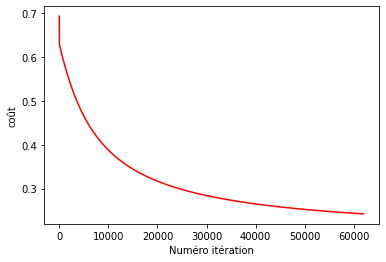

In [ ]:
plt.plot(range(62000), cout, c='r')
plt.xlabel('Numéro itération')
plt.ylabel('coût')

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

on voit bien qu'à partir de l'itération 60000 la fonction cout commence à devenir constante
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

# Dessin de la limite de decision (Descision Boundary)
Dans cette partie, nous aimerions dessiner la ligne separatrice d nos données

In [ ]:
def drawLine(X, theta):
  yline = -((theta[0] + theta[1]*X[:, 1])/theta[2])
  plt.plot(X[:, 1], yline, c='g', label='Decision Boundary')

# Affichage
Graphe representant les acceptations selon les caracteristiques

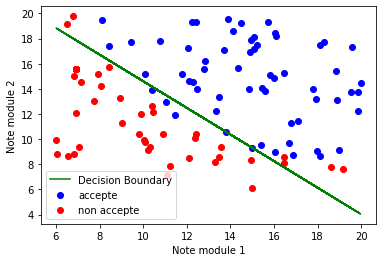

In [ ]:
plt.scatter(X[np.where(y==1),1],X[np.where(y==1),2], label="accepte", c='b')
plt.scatter(X[np.where(y==0),1],X[np.where(y==0),2], label="non accepte", c='r')
# appel à  la fonction drawLine()
drawLine(X, theta_final)
plt.xlabel('Note module 1')
plt.ylabel('Note module 2')
plt.legend()
plt.show()

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

nos données sont bien séparées par la limite de desicion
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

graphe de la fonction cout en fonction de theta1 etheta0

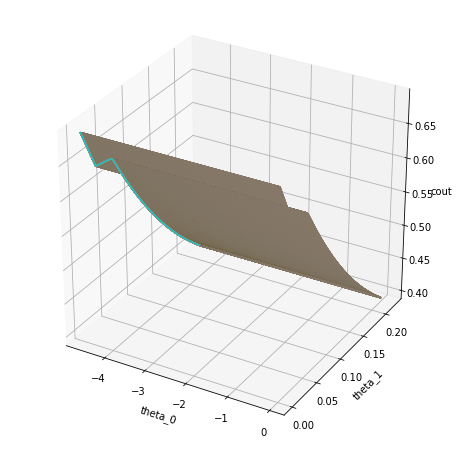

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
theta_0, theta_1 = np.meshgrid(np.array(parametres)[0:9500, 0, 0], np.array(parametres)[0:9500, 1, 0])
ax.plot3D(theta_0, theta_1, cout[0:9500])
ax.set_xlabel('theta_0')
ax.set_ylabel('theta_1')
ax.set_zlabel('cout')
plt.show()

Prédire des valeurs de y

In [ ]:
# Predire pour des notes note1= 9 et note2=17
predict = h_sigmoid([1, 9, 17], theta_final)
predict

array([0.66376643])

⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛
cet étudiant à 66% de chance d'être admis ( d'appartenir à la classe 1)
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

# Vérification de l'implementation
Comparer vos algorithmes à ceux de scikitlearn

In [ ]:
from sklearn.linear_model import LogisticRegression

# création d'un objet de la classe LogisticRegression
model = LogisticRegression()
# entrainement
model.fit(X[:, 1:3], y)
# prédiction
y_predict = model.predict(X[:, 1:3])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# affichage du theta finale
print(model.intercept_) # theta0
print(model.coef_) #theta1, theta2

[-22.93181743]
[[0.94159608 0.91667148]]


In [ ]:
# Predire pour des notes note1= 9 et note2=17
x = np.array([9, 17]).reshape(1, -1)
predict = model.predict(x)
print(predict)

[1.]


⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛

l'étudiant de note1=9 et note2=17 appartient à la classe1 (Admis), ce résultat confirme bien que les fonctions implémentée en haut  retourne des valeurs assez proches de ceux de sklearn
⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛⚛